# Creating 2D Graphs to see derivatives
SGMS 2025

Import the libraries:

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import ipywidgets as widgets
from IPython.display import display

We introduce Sympy to calculate symbolic derivatives:

In [130]:
x = sp.Symbol('x')

def get_derivative(expr):
    """Calculates the derivative of a symbolic expression."""
    return sp.diff(expr, x)

Function:

In [165]:
def create_2dGraph(x1, function_name, title="Derivative Graph"):
    """This function takes the chosen function and maps it into a 2d graph.
        Then, it locates and shows the derivative, as well as the tangent that defines it.

    Args:
        function: choose it from the list. You can add your desired functions.
        x1: defines the point where the derivative will be computed and shown.
    The tangent line is defined as:
        y = b + m * (x - x1)
    """
    symbolic_expr = sp.sympify(function_name)
    f = functions[function_name]
    
    # Define the domain:
    values = np.linspace(x1-20,x1+10, 200)
    # We start by plotting the function:
    plt.figure(figsize=(5,5))
    plt.plot(values, f(values), color='#134074')
    b = f(x1)
    
    # Define the domain where the derivative-line will live:
    xrange = np.linspace(x1-3,x1+3,20)
    
    # Now, we will compute the derivative using symbolic differentiation
    derivative_expr = get_derivative(symbolic_expr)
    derivative_func = sp.lambdify(x, derivative_expr)
    
    # Now, we add the tangent and derivative point:
    def line(x, x1, b): return derivative_func(x1) * (x - x1) + b
    #And finish the plot:
    plt.plot(xrange, line(xrange, x1, b), '--', color='#FF2626')
    plt.scatter(x1, b, s=10, color='#3D4042')
    plt.title(f"Derivative of {chosen_function_name} computed at {x1}", fontsize=12, fontweight='bold', color='#134074')
    
    plt.xlabel("x", fontsize=10) 
    plt.ylabel("y", fontsize=10) 
    plt.xticks(fontsize=8) 
    plt.yticks(fontsize=8) 
    
    plt.tight_layout()
    plt.show()

Now, let's create our function menu:

In [133]:
functions = {
    "x^2": lambda x: x**2,
    "log(x)": lambda x: np.log(x),  # Note: log(x) requires x > 0
    "exp(x)": lambda x: np.exp(x),
    "x^(1/2)": lambda x: sp.sqrt(x),  # Note: sqrt(x) requires x >= 0
    "x^3": lambda x: x**3,
}

In [144]:
function_dropdown = widgets.Dropdown(
    options=list(functions.keys()),
    description='Choose a function:'
)
display(function_dropdown)


Dropdown(description='Choose a function:', options=('x^2', 'log(x)', 'exp(x)', 'x^(1/2)', 'x^3'), value='x^2')

Let's plot it!

First, choose the function from above and run the following cell:

Now, choose the value for X

In [146]:
print("Choose a number:")
x1 = input("Enter the number: ")
x1 = float(x1)

Choose a number:


In [ ]:
print(chosen_function_name, "and the derivative will be computed on x =", x1)

x^2 and the derivative will be computed on x = 7.0


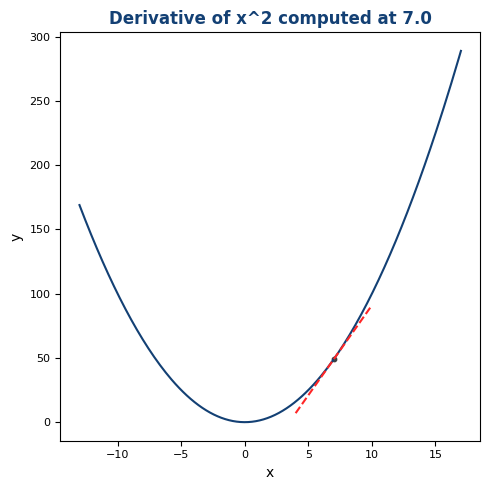

In [166]:
create_2dGraph(x1, chosen_function_name)

Now, you can play around! :)